## K-Means from scratch

In [67]:
import random
import math
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# points = [(random.uniform(0, 200), random.uniform(0, 200)) for _ in range(1000)]

In [ ]:
# x_cord, y_cord = zip(*points)

In [ ]:
# plot = plt.scatter(x_cord, y_cord, c='blue', marker='o')

## Implementing K means class

In [49]:
# Function to plot the clusters and centroids at each iteration
def plot_clusters(centroids, clusters, iteration, k, is_first=True):
    colors = ['red', 'blue', 'green', 'purple', 'orange']  # Colors for different clusters
    plt.figure(figsize=(6, 6))
    
    for i, cluster in clusters.items():
        if cluster:
            x_coords, y_coords = zip(*cluster)
            plt.scatter(x_coords, y_coords, color=colors[i % len(colors)], label=f'Cluster {i + 1}')
    
    # Plot centroids
    centroid_x, centroid_y = zip(*centroids)
    plt.scatter(centroid_x, centroid_y, color='black', marker='x', s=100, label='Centroids')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    if is_first:
        plt.title(f'Iteration {iteration + 1} (First 10)')
    else:
        plt.title(f'Iteration {iteration + 1} (Last 10)')
    
    plt.legend()
    plt.show()

In [53]:
class KMeans():
    def __init__(self, k=3):
        self.k = k
        self.centroids = None


    def euclidean(self, p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    def calc_centroids(self, clusterElements):
        x_cords = [x[0] for x in clusterElements]
        y_cords = [y[0] for y in clusterElements]
        return (sum(x_cords) / len(x_cords), sum(y_cords)/ len(y_cords))

    def fit(self, data, max_iterations=200):
        # creating random centroids
        centroids = random.sample(data, self.k)
        first_10 = []
        last_10 = []
        
        # Iterate n times
        for iteration in range(max_iterations):
            # creating cluster reference
            clusters = {i: [] for i in range(self.k)}
            
            # For every point, assign their centroids
            for point in data:
                distance_vector = [self.euclidean(point, cent) for cent in centroids]
                cluster_id = distance_vector.index(min(distance_vector))
                clusters[cluster_id].append(point)

            if iteration < 10:
                first_10.append((centroids[:], clusters.copy()))
                
            # Reassigning centroids
            new_centroids = []
            for cluster in clusters.items():
                if cluster[1]:
                    # the cluster should not be empty
                    new_centroids.append(self.calc_centroids(cluster[1]))
                else:
                    new_centroids.append(random.choice(data))
        

            # check for convergence
            if new_centroids == centroids:
                print(f"Convergence complete after {iteration} iterations.")
                break

            centroids = new_centroids
            if iteration >= max_iterations - 10:
                last_10.append((centroids[:], clusters.copy()))

        return centroids, clusters, first_10, last_10

In [54]:
k_instance = KMeans(k=3)

In [61]:
data_x, data_y = datasets.make_blobs(n_samples=200, n_features=2, centers=3)

In [62]:
centroids, clusters, f10_iteration, l10_iteration = k_instance.fit(data_x.tolist(), max_iterations=200)

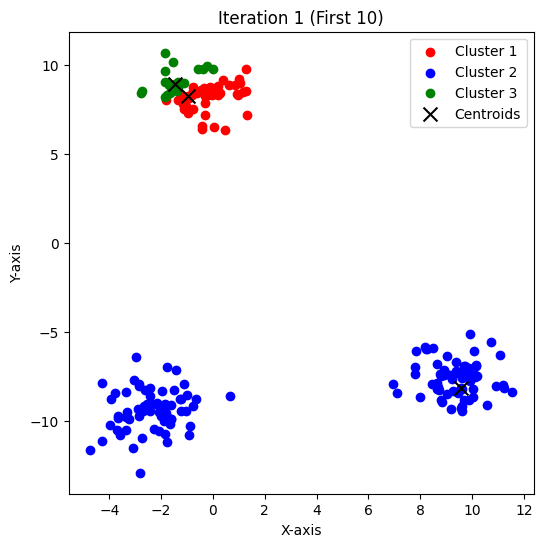

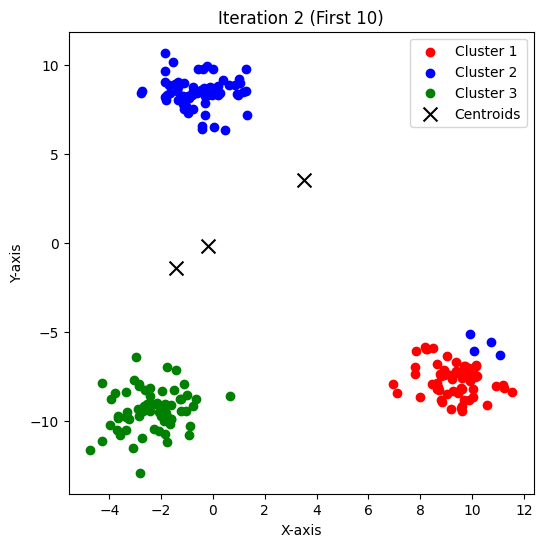

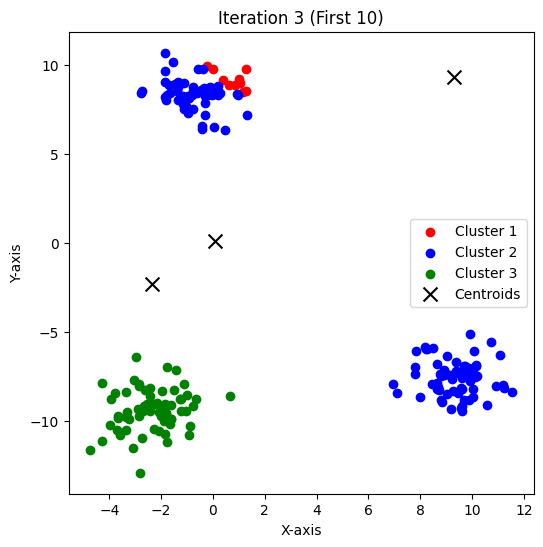

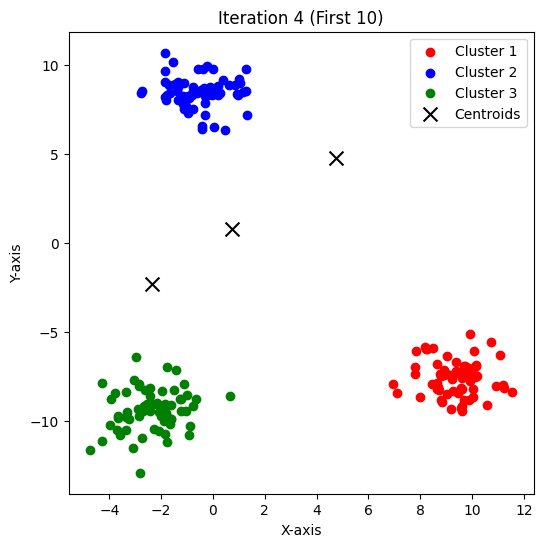

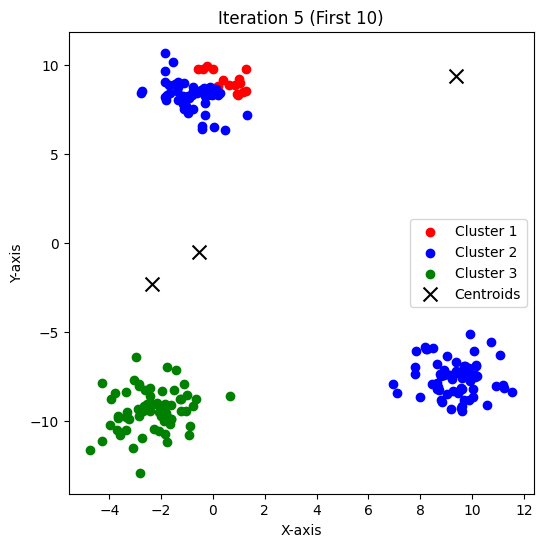

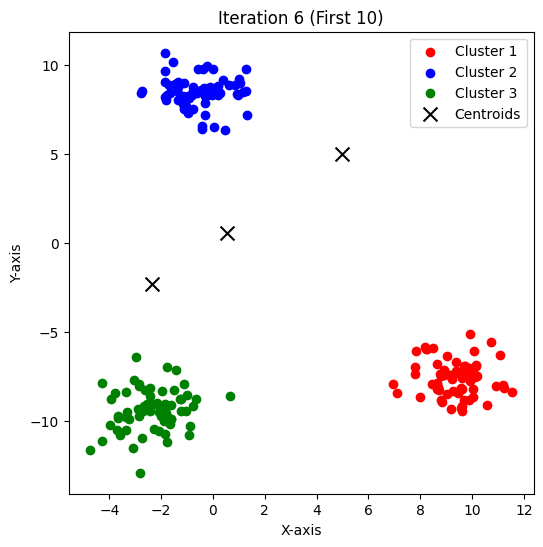

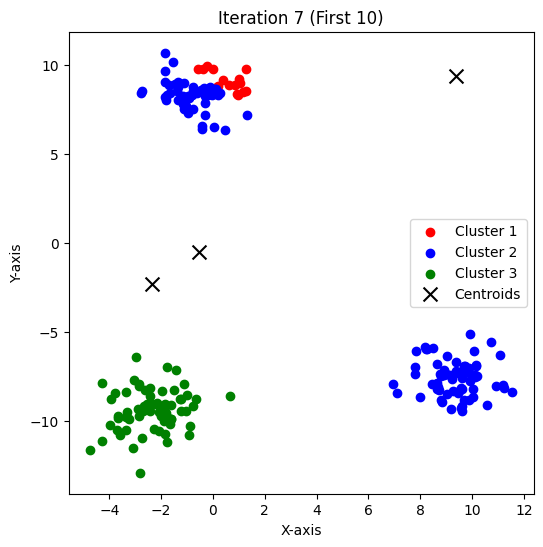

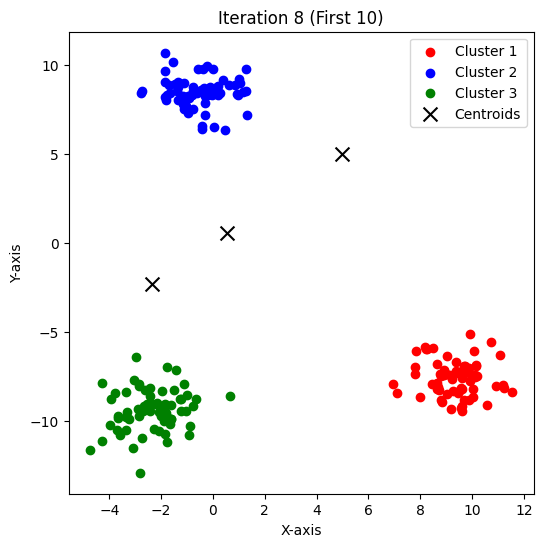

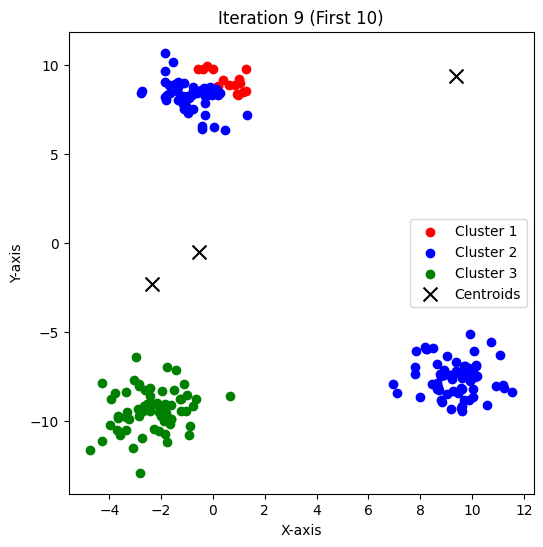

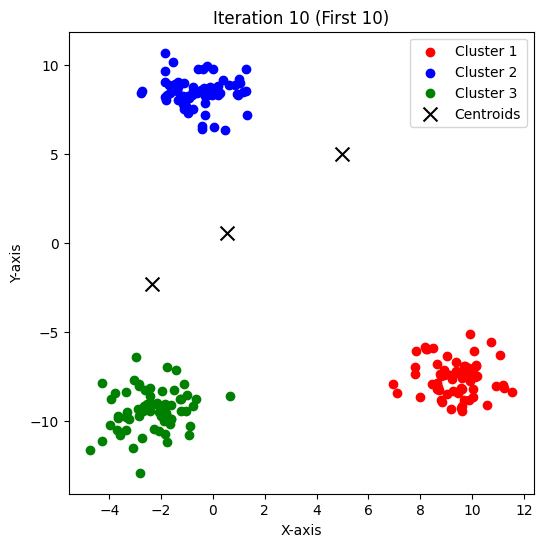

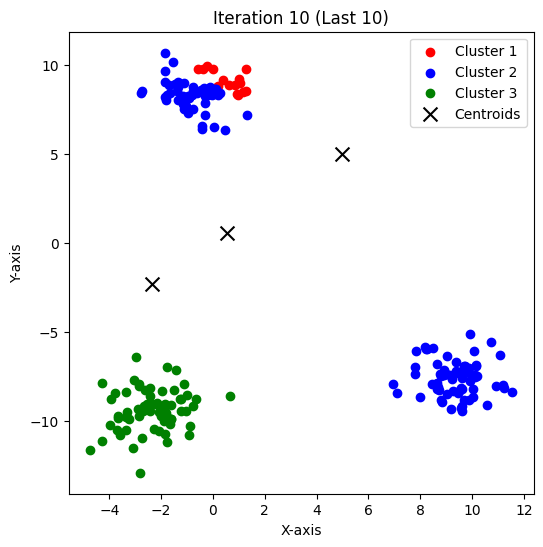

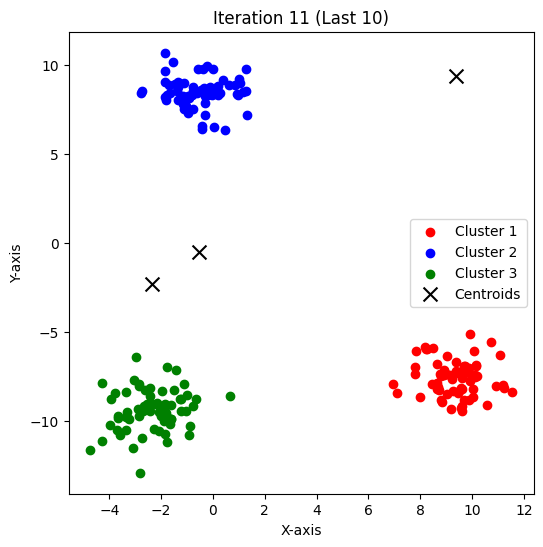

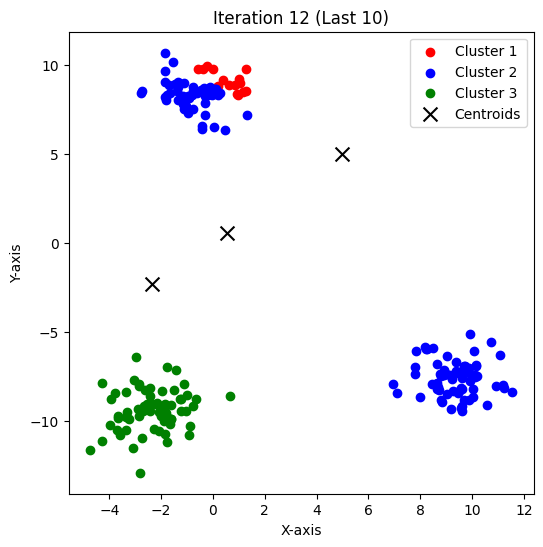

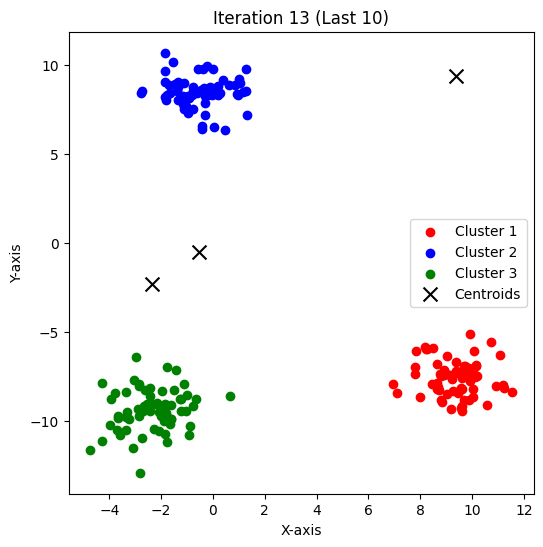

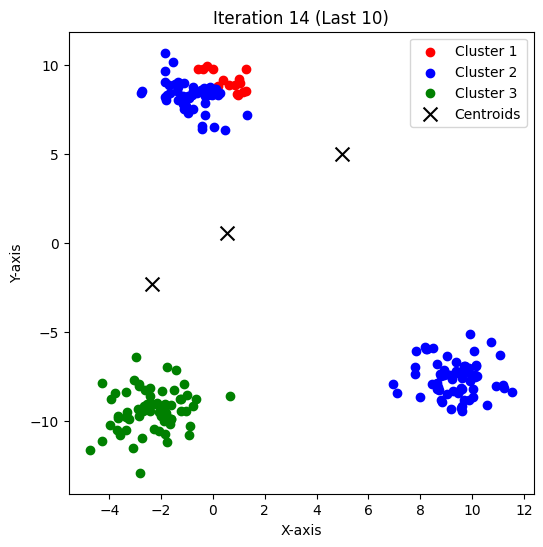

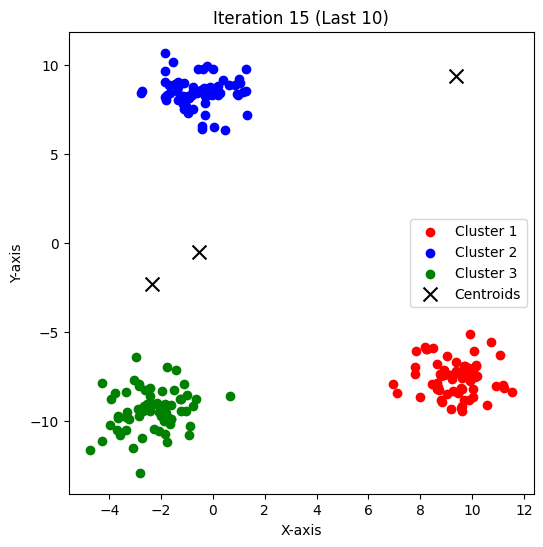

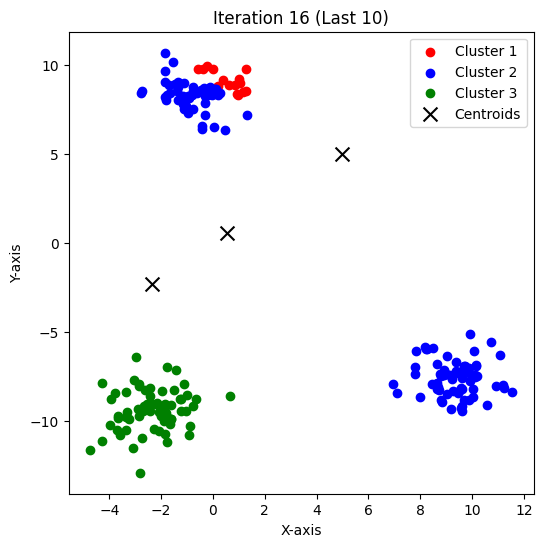

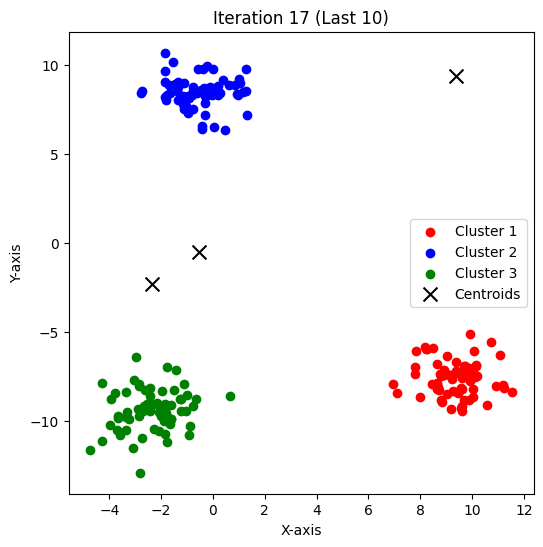

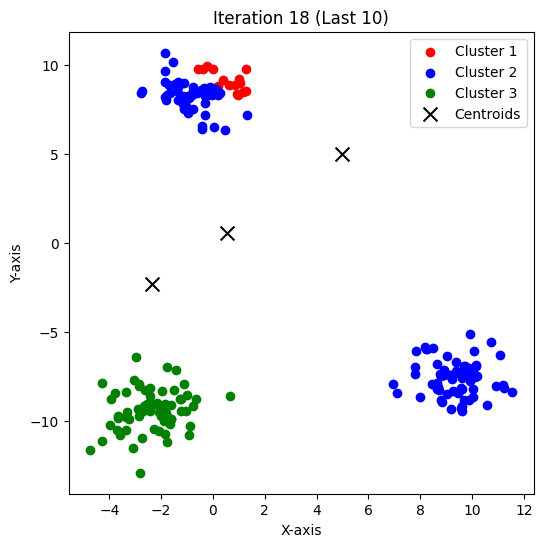

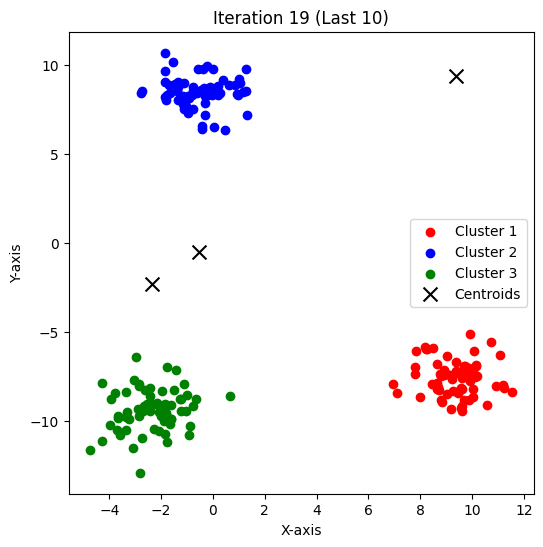

In [63]:
# Plot the first 10 iterations
for i, (centroids, clusters) in enumerate(f10_iteration):
    plot_clusters(centroids, clusters, i, 3, is_first=True)

# Plot the last 10 iterations
for i, (centroids, clusters) in enumerate(l10_iteration):
    plot_clusters(centroids, clusters, i + (len(f10_iteration) - 1), 3, is_first=False)

In [64]:
colors = ['red', 'blue', 'green']

In [65]:
centroids

[(9.363138452611443, 9.363138452611443),
 (-0.5386518957681447, -0.5386518957681447),
 (-2.3393412012054617, -2.3393412012054617)]

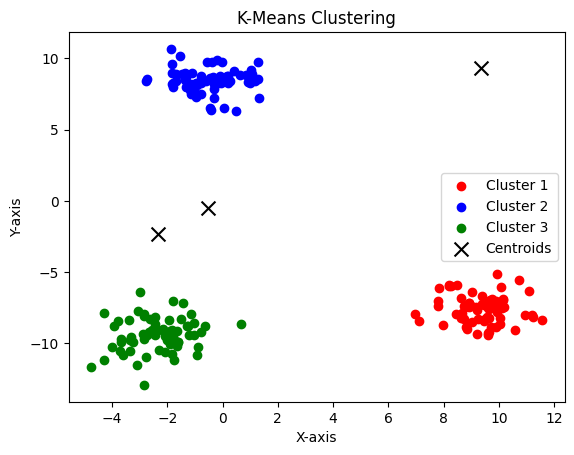

In [66]:
# visualisation

# Plotting points
for i, cluster in clusters.items():
    if cluster:
        x_cords, y_cords = zip(*cluster)
        plt.scatter(x_cords, y_cords, color=colors[i % len(colors)], label=f'Cluster {i + 1}')

# Plotting centroids
cent_x, cent_y = zip(*centroids)
plt.scatter(cent_x, cent_y, color='black', marker='x', s=100, label='Centroids')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


### Students Task

Can you improve this algorithm !!! If yes pls clone this and try it.

### History

In [ ]:
def euclidean(p1, p2):
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** (0.5)

In [ ]:
clusters = {i: [] for i in range(3)}

In [ ]:
centroids = random.sample(points, 3)

In [ ]:
p1 = random.sample(points, 10)

In [ ]:
clusters[3] = []

In [ ]:
for cluster in clusters.items():
    # if cluster[1]:
    print(cluster[1])

In [ ]:
centroids

In [ ]:
for p in p1:
    print(p)
    distance_vector = [euclidean(p, cent) for cent in centroids]
    cluster_id = distance_vector.index(min(distance_vector))
    clusters[cluster_id].append(p)

In [ ]:
c

In [ ]:
clusters

In [ ]:
distance_vector

In [ ]:
centroids

In [6]:
from sklearn import datasets

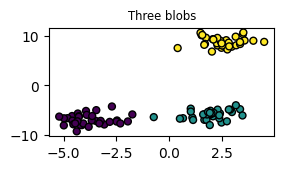

In [7]:
plt.subplot(325)
plt.title("Three blobs", fontsize="small")
X1, Y1 = datasets.make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

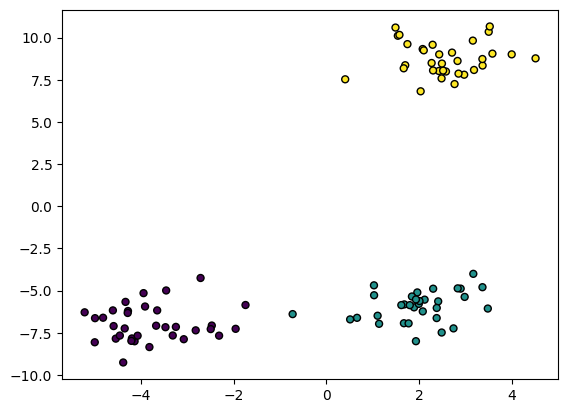

In [35]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [ ]:
X1.tolist()

In [ ]:
Y1